<a href="https://colab.research.google.com/github/GergelyTuri/sleep/blob/master/notebooks/clustering/clustering_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/GergelyTuri/sleep.git
%cd sleep
!pip install .

from google.colab import drive
drive.mount('/gdrive')

from os.path import join
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import numpy as np
import pandas as pd
import seaborn as sns
from sleep.src import google_drive
from sleep.src import clustering

useful_data = google_drive.useful_datasets()

Cloning into 'sleep'...
remote: Enumerating objects: 1081, done.
remote: Counting objects: 100% (456/456), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 1081 (delta 281), reused 319 (delta 186), pack-reused 625
Receiving objects: 100% (1081/1081), 27.06 MiB | 12.27 MiB/s, done.
Resolving deltas: 100% (643/643), done.
Updating files: 100% (92/92), done.
/content/sleep
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.11-py3-none-any.whl size=1011 sha256=1df179b5aacb5df9943fdd1c738738c0fc68d33c5b7b93af071b2ffa20afceca
  Stored in directory: /tmp/pip-ephem-wheel-cache-9y6gnyme/wheels/10/eb/42/5281370ac4a2d7b033087761ebaa8f968a9ef5108cbc009a46
Successfully built sleep
Mounted at /gdrive


In [ ]:
!git pull

In [2]:
exp_path = google_drive.return_exp_path('5HT2afl05b_1', '7_12_SD2', 'TSeries-07122021-0901-002')
processed_sleep_df = pd.read_csv(join(exp_path, 'eeg', 'velo_eeg.csv'), )
file_name = 'dfof_mc.csv'
dfof_data = pd.read_csv(join(exp_path, file_name))
dfof_data.set_index('roi_label', drop=True, inplace=True)

In [9]:
exp_path = google_drive.return_exp_path('5HT2afl05b_2', '7_6_SD', 'TSeries-07062021-0844_MC2-004')

In [19]:
exp_path = google_drive.return_exp_path('126031_5', '11_23', 'TSeries-11232022-GC-MC-002')

In [28]:
exp_path = google_drive.return_exp_path('sert52b_1', '4_3_SD', 'TSeries-04032023-1323_SD_sess1-001')

In [36]:
exp_path = google_drive.return_exp_path('sert52b_5', '4_3_SD', 'TSeries-04032023-1323-001')

In [45]:
exp_path = google_drive.return_exp_path('sert54a_5', '4_4', 'TSeries-04042023-1023_sess1-001')

In [46]:
processed_sleep_df = pd.read_csv(join(exp_path, 'eeg', 'velo_eeg.csv'), )
file_name = 'dfof.csv'
dfof_data = pd.read_csv(join(exp_path, file_name))
dfof_data.set_index('roi_label', drop=True, inplace=True)

In [47]:
summary_sleep = clustering.df_generator(processed_sleep_df)

In [48]:
summary_sleep

,n,sleep,length,end,start
0,0,0,3120,3119,0
1,1,1,621,3740,3120
2,2,0,1861,5601,3741
3,3,1,801,6402,5602
4,4,0,1641,8043,6403
5,5,1,761,8804,8044
6,6,1,961,9765,8805
7,7,0,701,10466,9766
8,8,1,601,11067,10467
9,9,0,1661,12728,11068


In [49]:
result = clustering.process_dfof_mc(dfof_data, summary_sleep)
d_awake = result['d_awake']
d_sleep = result['d_sleep']
cos_dist_nrem = clustering.calculate_cosine_distance(d_sleep, 'nrem', normalize=False)
cos_dist_awake = clustering.calculate_cosine_distance(d_awake, 'awake', normalize=False)
# Save cos_dist_nrem and cos_dist_awake to CSV files
cos_dist_nrem.to_csv(join(exp_path, 'cos_dist_nrem.csv'), index=False)
cos_dist_awake.to_csv(join(exp_path, 'cos_dist_awake.csv'), index=False)

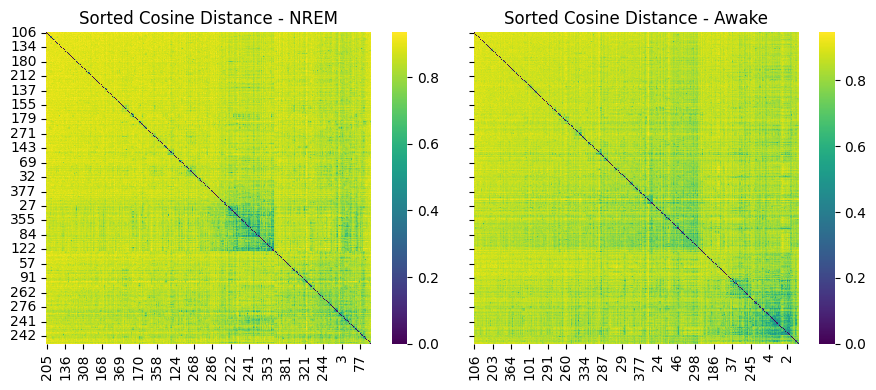

In [50]:
sorted_cos_dist_nrem = clustering.sort_distance_matrix(cos_dist_nrem)
sorted_cos_dist_awake = clustering.sort_distance_matrix(cos_dist_awake)

# Now plot the sorted matrices using seaborn's heatmap function
fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

sns.heatmap(sorted_cos_dist_nrem, ax=axs[0], cmap="viridis")
axs[0].set_title("Sorted Cosine Distance - NREM")

sns.heatmap(sorted_cos_dist_awake, ax=axs[1], cmap="viridis")
axs[1].set_title("Sorted Cosine Distance - Awake")

plt.tight_layout()

# saving the fig
fig.savefig(join(exp_path, "MC_sorted_cosine_dist.png"), dpi=300)

plt.show()

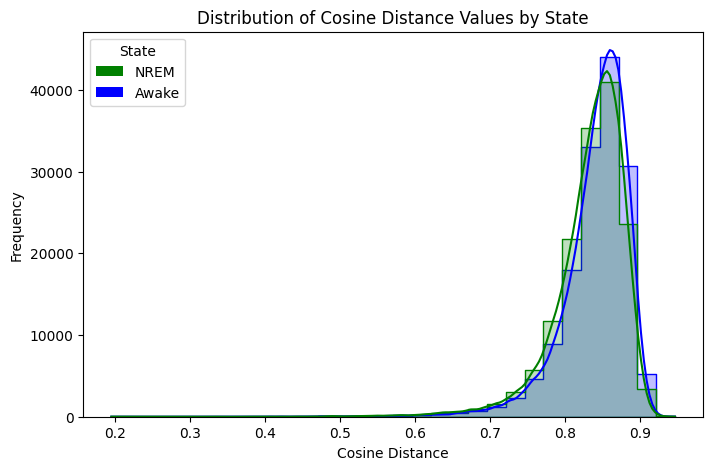

In [51]:
# Flatten the matrices and remove the diagonal (self-distance) values
distance_values_nrem = cos_dist_nrem.values.flatten()
distance_values_nrem = distance_values_nrem[~np.isnan(distance_values_nrem)]  # Remove NaN values if any
distance_values_nrem = distance_values_nrem[distance_values_nrem != 0]  # Remove self-distances

distance_values_awake = cos_dist_awake.values.flatten()
distance_values_awake = distance_values_awake[~np.isnan(distance_values_awake)]  # Remove NaN values if any
distance_values_awake = distance_values_awake[distance_values_awake != 0]  # Remove self-distances

# Combine the distance values into a single array with an associated label array
distance_values_combined = np.concatenate([distance_values_nrem, distance_values_awake])
states_combined = ['NREM'] * len(distance_values_nrem) + ['Awake'] * len(distance_values_awake)

# Create DataFrame
distances_df = pd.DataFrame({
    'Cosine Distance': distance_values_combined,
    'State': states_combined
})

distances_df['State'] = distances_df['State'].astype('category')

# Plot
plt.figure(figsize=(8, 5))
ax = sns.histplot(
    data=distances_df,
    x='Cosine Distance',
    hue='State',
    kde=True,
    element='step',
    bins=30,
    palette=['green', 'blue']  # Explicitly set the palette here to match your desired colors
)

plt.title('Distribution of Cosine Distance Values by State')
plt.xlabel('Cosine Distance')
plt.ylabel('Frequency')

# Create custom legend handles with colors matching the plot
legend_handles = [
    Patch(facecolor='green', label='NREM'),
    Patch(facecolor='blue', label='Awake')
]

# Use the custom handles to create the legend, ensuring colors match the plot
plt.legend(handles=legend_handles, title='State')

# Saving the figure
plt.savefig(join(exp_path, 'MC_distrib_cosine_distance_values.png'), dpi=300)

plt.show()

In [52]:
from scipy.stats import ks_2samp

# Separate the distance values for each state
distance_values_nrem = distances_df[distances_df['State'] == 'NREM']['Cosine Distance']
distance_values_awake = distances_df[distances_df['State'] == 'Awake']['Cosine Distance']

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(distance_values_nrem, distance_values_awake)

# Print the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The distributions of NREM and Awake states are statistically different.")
else:
    print("There is no significant difference in the distributions of NREM and Awake states.")


KS Statistic: 0.07973041370308215
P-value: 0.0
The distributions of NREM and Awake states are statistically different.
